In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [107]:
universe = pd.read_csv('universe.csv')
df = pd.DataFrame(universe)
df.set_index('ticker', inplace=True)

In [108]:
df.roa = df.roa.str.replace('%','').astype('float')
df.roe = df.roe.str.replace('%','').astype('float')
df.oper_margin = df.oper_margin.str.replace('%','').astype('float')
df.profit_margin = df.profit_margin.str.replace('%','').astype('float')
df.loc['TSLA','trail_pe'] = 1640
df.trail_pe = df.trail_pe.astype('float')
df.loc['NLOK','px2book'] = 1190
df.px2book = df.px2book.astype('float')
df['ticker2'] = df.index
df['analyst_est'] = (df['1y_est'] / df['px'])-1

In [109]:
df

,name,div_yld,eps,pe,1y_est,52wk_low,52wk_high,avg_vol,beta,mktcap,...,social_risk,dt_add,founded,hq,name_y,sector_y,sub_industry,1yperf,ticker2,analyst_est
ticker,,,,,,,,,,,,,,,,,,,,,
MMM,3M Company,3.27,9.25,19.16,182.93,114.04,187.27,2761219,0.95,102.622,...,14.0,8/9/1976,1902,"St. Paul, Minnesota",3M Company,Industrials,Industrial Conglomerates,12.47%,MMM,0.032278
ABT,Abbott Laboratories,1.42,2.50,50.68,134.88,61.61,126.87,4921956,0.73,224.806,...,16.2,3/31/1964,1888,"North Chicago, Illinois",Abbott Laboratories,Health Care,Health Care Equipment,44.27%,ABT,0.063387
ABBV,AbbVie Inc.,5.01,2.72,38.14,120.48,62.55,113.41,7642975,0.81,183.168,...,17.1,12/31/2012,2013 (1888),"North Chicago, Illinois",AbbVie Inc.,Health Care,Pharmaceuticals,11.57%,ABBV,0.161253
ABMD,"Abiomed, Inc.",NaN,4.39,73.61,378.00,119.01,387.40,308061,1.39,14.606,...,NaN,5/31/2018,1981,"Danvers, Massachusetts",Abiomed,Health Care,Health Care Equipment,94.30%,ABMD,0.170532
ACN,Accenture plc,1.37,8.12,31.88,281.36,137.15,271.18,1895051,1.12,171.584,...,5.0,7/6/2011,1989,"Dublin, Ireland",Accenture plc,Information Technology,IT Consulting & Other Services,20.45%,ACN,0.086458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,"Yum! Brands, Inc.",1.91,2.94,35.88,112.50,54.95,110.66,1615941,1.05,31.644,...,13.0,10/6/1997,1997,"Louisville, Kentucky",Yum! Brands Inc,Consumer Discretionary,Restaurants,1.38%,YUM,0.066553
ZBRA,Zebra Technologies Corporation,NaN,8.76,53.66,425.78,150.06,477.68,357119,1.63,25.063,...,NaN,12/23/2019,1969,"Lincolnshire, Illinois",Zebra Technologies,Information Technology,Electronic Equipment & Instruments,101.87%,ZBRA,-0.094239
ZBH,"Zimmer Biomet Holdings, Inc.",0.60,-0.67,NaN,178.58,74.37,170.05,1163751,1.35,33.623,...,19.0,8/7/2001,1927,"Warsaw, Indiana",Zimmer Biomet,Health Care,Health Care Equipment,1.34%,ZBH,0.100919


In [63]:
mgr_perf = df[['roa','roe','curr_ratio','oper_margin','profit_margin','ticker2']]
mgr_perf

,roa,roe,curr_ratio,oper_margin,profit_margin,ticker2
ticker,,,,,,
MMM,9.53,46.74,1.88,21.79,16.73,MMM
ABT,NaN,14.22,NaN,16.53,12.99,ABT
ABBV,NaN,129.89,NaN,34.17,10.08,ABBV
ABMD,10.82,17.37,5.76,27.96,24.66,ABMD
ACN,11.61,31.34,1.45,14.84,11.74,ACN
...,...,...,...,...,...,...
YUM,18.70,NaN,1.01,29.33,15.99,YUM
ZBRA,8.11,26.15,0.68,14.91,10.94,ZBRA
ZBH,2.45,-1.12,1.99,13.71,-1.98,ZBH


In [98]:
q=.90
roa = df.loc[df.roa>df.roa.quantile(q),['roa']]
roe = df.loc[df.roe>df.roe.quantile(q),['roe']]
# roa = mgr_perf.loc[mgr_perf.roa>mgr_perf.roa.quantile(q),['roa']]
# roe = mgr_perf.loc[mgr_perf.roe>mgr_perf.roe.quantile(q),['roe']]

In [99]:
merge = pd.merge(roa,roe, how='inner', left_index=True, right_index=True)
merge

,roa,roe
ticker,,
MO,14.89,95.56
AAPL,13.36,82.09
CLX,15.58,127.03
CL,15.35,344.79
HSY,13.22,64.05
HOLX,17.07,49.87
HD,20.42,5514.35
IDXX,21.04,143.63
KMB,13.94,450.80


In [96]:
q=.85
curr_ratio = df.loc[df.curr_ratio>df.curr_ratio.quantile(q),['curr_ratio']]
oper_margin = df.loc[df.oper_margin>df.oper_margin.quantile(q),['oper_margin']]
profit_margin = df.loc[df.profit_margin>df.profit_margin.quantile(q), ['profit_margin']]
# curr_ratio = mgr_perf.loc[mgr_perf.curr_ratio>mgr_perf.curr_ratio.quantile(q),['curr_ratio']]
# oper_margin = mgr_perf.loc[mgr_perf.oper_margin>mgr_perf.oper_margin.quantile(q),['oper_margin']]
# profit_margin = mgr_perf.loc[mgr_perf.profit_margin>mgr_perf.profit_margin.quantile(q), ['profit_margin']]

In [97]:
merge = pd.merge(curr_ratio,oper_margin, how='inner', left_index=True, right_index=True)
merge1 = pd.merge(merge,profit_margin, how='inner', left_index=True, right_index=True)
merge1

,curr_ratio,oper_margin,profit_margin
ticker,,,
ATVI,3.41,34.97,27.17
ANET,5.50,31.19,32.06
BXP,4.97,32.73,31.55
FB,5.05,38.01,33.90
INTU,3.09,30.31,25.10
KIM,105.26,33.65,83.81
MKTX,6.19,54.38,43.44
MXIM,5.67,33.54,30.66
MNST,3.65,35.03,26.99


In [95]:
q=.85
div_yld = df.loc[df.div_yld>df.div_yld.quantile(q),['div_yld']]
_5y_div_yld = df.loc[df._5y_div_yld>df._5y_div_yld.quantile(q),['_5y_div_yld']]
merge = pd.merge(div_yld,_5y_div_yld, how='inner', left_index=True, right_index=True)
merge

,div_yld,_5y_div_yld
ticker,,
ABBV,5.01,4.14
MO,7.90,5.38
T,7.29,5.78
CVX,5.58,4.35
DUK,4.27,4.22
ETR,4.02,4.05
XOM,6.81,4.86
FE,5.01,4.18
PEAK,3.92,5.57


In [ ]:
merge2 = pd.merge(merge1,px2sales, how='inner', left_index=True, right_index=True)
merge3 = pd.merge(merge2,px2book, how='inner', left_index=True, right_index=True)
merge4 = pd.merge(merge3,ev2rev, how='inner', left_index=True, right_index=True)
merge5 = pd.merge(merge4,ev2ebitda, how='inner', left_index=True, right_index=True)

In [11]:
pe = valuation.loc[valuation.pe<18.75,'pe']
peg = valuation.loc[valuation.peg<1.5775,'peg']
px2sales = valuation.loc[valuation.px2sales<1.6025,'px2sales']
px2book = valuation.loc[valuation.px2book<2.0125,'px2book']
ev2rev = valuation.loc[valuation.ev2rev<1.97, 'ev2rev']
ev2ebitda = valuation.loc[valuation.ev2ebitda<11.76,'ev2ebitda']

In [7]:
merge1 = pd.merge(pe,peg, how='inner', left_index=True, right_index=True)
merge2 = pd.merge(merge1,px2sales, how='inner', left_index=True, right_index=True)
merge3 = pd.merge(merge2,px2book, how='inner', left_index=True, right_index=True)
merge4 = pd.merge(merge3,ev2rev, how='inner', left_index=True, right_index=True)
merge5 = pd.merge(merge4,ev2ebitda, how='inner', left_index=True, right_index=True)

In [8]:
merge5

,pe,peg,px2sales,px2book,ev2rev,ev2ebitda
ticker,,,,,,
CVS,12.17,1.26,0.36,1.37,0.64,9.30
DISH,12.91,1.18,1.18,1.20,1.88,9.41
GM,12.36,0.90,0.68,1.81,1.31,7.28
LEN,12.05,0.76,1.25,1.58,1.43,9.96
TSN,11.15,1.23,0.55,1.54,0.79,7.66


In [45]:
q=.35
pe = valuation.loc[valuation.pe<valuation.pe.quantile(q),'ticker2']
peg = valuation.loc[valuation.peg<valuation.peg.quantile(q),'ticker2']
px2sales = valuation.loc[valuation.px2sales<valuation.px2sales.quantile(q),'ticker2']
px2book = valuation.loc[valuation.px2book<valuation.px2book.quantile(q),'ticker2']
ev2rev = valuation.loc[valuation.ev2rev<valuation.px2book.quantile(q), 'ticker2']
ev2ebitda = valuation.loc[valuation.ev2ebitda<valuation.ev2ebitda.quantile(q),'ticker2']

In [46]:
merge1 = pd.merge(pe,peg, how='inner', left_index=True, right_index=True)
merge2 = pd.merge(merge1,px2sales, how='inner', left_index=True, right_index=True)
merge3 = pd.merge(merge2,px2book, how='inner', left_index=True, right_index=True)
merge4 = pd.merge(merge3,ev2rev, how='inner', left_index=True, right_index=True)
merge5 = pd.merge(merge4,ev2ebitda, how='inner', left_index=True, right_index=True)

In [48]:
merge5

,ticker2_x,ticker2_y,ticker2_x,ticker2_y,ticker2_x,ticker2_y
ticker,,,,,,
CNC,CNC,CNC,CNC,CNC,CNC,CNC
CVS,CVS,CVS,CVS,CVS,CVS,CVS
DGX,DGX,DGX,DGX,DGX,DGX,DGX
DHI,DHI,DHI,DHI,DHI,DHI,DHI
DISH,DISH,DISH,DISH,DISH,DISH,DISH
GM,GM,GM,GM,GM,GM,GM
LEN,LEN,LEN,LEN,LEN,LEN,LEN
LKQ,LKQ,LKQ,LKQ,LKQ,LKQ,LKQ
TSN,TSN,TSN,TSN,TSN,TSN,TSN


In [ ]:
# filt = np.logical_and(df.pe < df.pe.quantile(.25), df.trail_pe < df.trail_pe.quantile(.25),\
#                       df.fwd_pe < df.fwd_pe.quantile(.25))#,df.peg < df.peg.quantile(.25) )

In [23]:
test = valuation[valuation.peg < df.peg.quantile(.25)] #filt = np.logical_and(df['pe']<70, df['beta']<1)

In [172]:
val_quant['pe']

0.25    18.75
Name: pe, dtype: float64

In [146]:
df.px2book = df.px2book.astype('float')

In [150]:
df.ev2ebitda.describe()

count    451.000000
mean      20.916962
std       33.176649
min     -276.720000
25%       11.760000
50%       17.110000
75%       25.650000
max      292.200000
Name: ev2ebitda, dtype: float64

In [123]:
df.roa.describe()

count    476.000000
mean       5.396576
std        5.269718
min      -13.610000
25%        2.210000
50%        4.490000
75%        7.880000
max       30.880000
Name: roa, dtype: float64

In [89]:
df.pe.describe()

count     408.000000
mean       47.171838
std        95.540475
min         2.620000
25%        18.750000
50%        28.505000
75%        42.587500
max      1268.220000
Name: pe, dtype: float64

In [94]:
filt = df['pe']<df['pe'].quantile([.25])

ValueError: Can only compare identically-labeled Series objects

In [91]:
df.loc[filt,['beta','pe']]

SyntaxError: invalid syntax (<ipython-input-91-47bbca18910e>, line 2)

In [87]:
filt = np.logical_and(df['pe']<70, df['beta']<1)
df.loc[filt,['beta','pe']]

,beta,pe
ticker,,
MMM,0.95,19.16
ABT,0.73,50.68
ABBV,0.81,38.14
ATVI,0.66,36.61
ADBE,0.97,45.86
...,...,...
WAT,0.82,33.83
WEC,0.17,22.15
WLTW,0.77,29.87


In [71]:
pe = df.sort_values('pe').head(50)['pe']

In [73]:
beta = df.sort_values('beta').head(50)['beta']

In [84]:
pd.merge(pe,beta, how='inner')

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [81]:
df.beta.quantile(.25)

0.79

In [83]:
df.beta.describe()

count    482.000000
mean       1.135249
std        0.552180
min       -0.050000
25%        0.790000
50%        1.070000
75%        1.417500
max        4.990000
Name: beta, dtype: float64

In [24]:
df.pe.describe()

count     408.000000
mean       47.171838
std        95.540475
min         2.620000
25%        18.750000
50%        28.505000
75%        42.587500
max      1268.220000
Name: pe, dtype: float64

In [34]:
pe = df['pe']
pe = pe.loc[(df['pe'] < 100)]
# plt.hist(pe)
pe.shape

(380,)

In [ ]:
df['industry'].unique()

<AxesSubplot:xlabel='sector'>

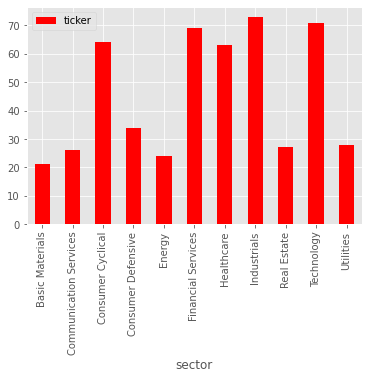

In [47]:
sector_pe = df.groupby('sector').agg({'ticker':'count'})
# sector_pe.plot.bar
sector_pe.plot(kind='bar',y='ticker', color='r')

In [20]:
pe_df.mean()
#keeps rows that are within 3 std deviations
pe_df = pe_df.loc[pe_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

AttributeError: 'float' object has no attribute 'mean'